In [25]:
from scipy.fft import fft
from baseline.main_model import *
import matplotlib.pyplot as plt

def clean_data(intraday_file, daily_file, ticker):
    '''Formats data and selects two years prior to prediction date.'''
    daily_data = pd.read_csv(daily_file, parse_dates=['DATE'])
    intraday_data = pd.read_csv(intraday_file)

    intraday_data = format_intraday(intraday_data)

    daily_data = daily_data.loc[daily_data['symbol'] == ticker]
    intraday_data = intraday_data.loc[intraday_data['symbol'] == ticker]

    return daily_data, intraday_data

def agg_intraday_daily(intraday_data, daily_data):
    '''Aggregate intraday and daily data for a specific symbol.'''

    intraday_data, daily_data = eliminate_half_days(intraday_data, daily_data)
    daily_data['daily_vol_pct'] = daily_data['total_vol_m'].rank(pct=True)

    df = intraday_data.merge(daily_data[['DATE', 'symbol', 'total_vol_m', 'daily_vol_pct']], how='left', left_on=['date', 'symbol'],
                     right_on=['DATE', 'symbol'])
    df.index = pd.DatetimeIndex(df['datetime'])
    df['time'] = df.index.time

    df.drop(columns=['DATE', 'datetime'], inplace=True)

    df = df.between_time('09:31:00', '15:59:00')
    df['%_vol'] = df['size'] / df['total_vol_m']

    df.dropna(inplace=True)

    return df

In [17]:
intraday_file = '/Users/fandimeng/OneDrive - The University of Chicago/Academics/MPCS/2021-2022/Data Science Clinic/data/fandi_intraday_data.csv'
daily_file = '/Users/fandimeng/OneDrive - The University of Chicago/Academics/MPCS/2021-2022/Data Science Clinic/data/fandi_daily.csv'
ticker = 'GOOGL'

In [18]:
daily_data, intraday_data = clean_data(intraday_file, daily_file, ticker)
historical = agg_intraday_daily(intraday_data, daily_data)

In [20]:
historical['log_vol'] = np.log(historical['size'])

In [32]:
date = '2021-12-01'
date = datetime.strptime(date, '%Y-%m-%d').date()
day = historical.loc[historical['date'].dt.date == date]

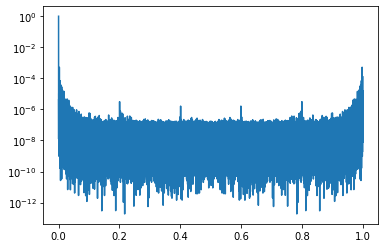

In [36]:
f = abs(np.fft.fft(historical['log_vol']))
x = list(range(len(historical.index)))
num = np.size(x)
freq = [i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]
plt.semilogy(freq,nspectrum)

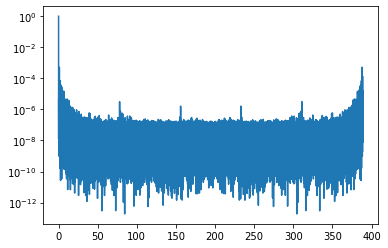

In [37]:
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/389)
plt.semilogy(results['period'], results['nspectrum'])

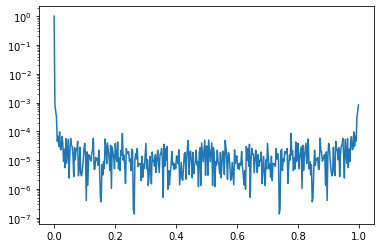

In [33]:
f = abs(np.fft.fft(day['log_vol']))
x = list(range(len(day.index)))
num = np.size(x)
freq = [i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]
plt.semilogy(freq,nspectrum)

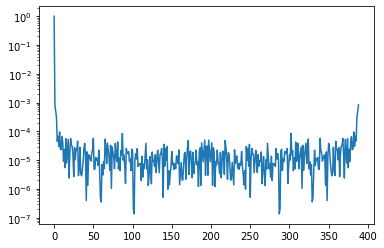

In [35]:
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/389)
plt.semilogy(results['period'], results['nspectrum'])

In [34]:
len(day)

389